# 2020 Rookie Stat Prediction Model

#### Data Cleaning and Transforming

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('../Final_Combined_DF_v2.csv')
df.head()

,Unnamed: 0,Name,Year,School,G,MP,FG,FGA,FG%,2P,...,PF,NBATM,NBAPTS,NBATRB,NBAAST,NBASTL,NBABLK,NBATOV,Pick,Position
0,0,Kenyon Martin,2001,Cincinnati,31,29.3,7.1,12.5,0.568,7.1,...,2.3,NJN,12.0,7.4,1.9,1.1,1.7,2.0,1,PF
1,1,Stromile Swift,2001,LSU,34,29.8,6.1,10.1,0.608,5.9,...,2.6,VAN,4.9,3.6,0.4,0.8,1.0,0.8,2,PF
2,2,Marcus Fizer,2001,Iowa State,37,33.6,8.8,15.2,0.582,8.4,...,2.8,CHI,9.5,4.3,1.1,0.4,0.3,1.7,4,PF
3,3,Mike Miller,2001,Florida,37,28.6,4.7,9.9,0.476,3.5,...,1.9,ORL,11.9,4.0,1.7,0.6,0.2,1.2,5,SF
4,4,DerMarr Johnson,2001,Cincinnati,32,27.5,4.4,9.2,0.478,2.8,...,2.0,ATL,5.1,2.3,0.8,0.6,0.4,1.2,6,SF


In [2]:
# Drop Unnamed column
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
# Convert team names to unique integers
team_names = df.NBATM.unique()
team_dict = dict(zip(team_names, range(len(team_names))))
df1 = df.replace({'NBATM': team_dict})
df1.head()

,Name,Year,School,G,MP,FG,FGA,FG%,2P,2PA,...,PF,NBATM,NBAPTS,NBATRB,NBAAST,NBASTL,NBABLK,NBATOV,Pick,Position
0,Kenyon Martin,2001,Cincinnati,31,29.3,7.1,12.5,0.568,7.1,12.3,...,2.3,0,12.0,7.4,1.9,1.1,1.7,2.0,1,PF
1,Stromile Swift,2001,LSU,34,29.8,6.1,10.1,0.608,5.9,9.3,...,2.6,1,4.9,3.6,0.4,0.8,1.0,0.8,2,PF
2,Marcus Fizer,2001,Iowa State,37,33.6,8.8,15.2,0.582,8.4,14.1,...,2.8,2,9.5,4.3,1.1,0.4,0.3,1.7,4,PF
3,Mike Miller,2001,Florida,37,28.6,4.7,9.9,0.476,3.5,6.2,...,1.9,3,11.9,4.0,1.7,0.6,0.2,1.2,5,SF
4,DerMarr Johnson,2001,Cincinnati,32,27.5,4.4,9.2,0.478,2.8,4.8,...,2.0,4,5.1,2.3,0.8,0.6,0.4,1.2,6,SF


In [4]:
# Amend PF column name to avoid duplicate column names
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 33 columns):
Name        718 non-null object
Year        718 non-null int64
School      718 non-null object
G           718 non-null int64
MP          718 non-null float64
FG          718 non-null float64
FGA         718 non-null float64
FG%         718 non-null float64
2P          718 non-null float64
2PA         718 non-null float64
2P%         718 non-null float64
3P          718 non-null float64
3PA         718 non-null float64
3P%         718 non-null float64
FT          718 non-null float64
FTA         718 non-null float64
FT%         718 non-null float64
PTS         718 non-null float64
TRB         718 non-null float64
AST         718 non-null float64
STL         718 non-null float64
BLK         718 non-null float64
TOV         718 non-null float64
NBATM       718 non-null int64
NBAPTS      718 non-null float64
NBATRB      718 non-null float64
NBAAST      718 non-null float64
NBASTL      

In [5]:
# Dummify player positions
pos_dum = pd.get_dummies(df1['Position'])
df1 = pd.concat([df1, pos_dum], axis=1)
df1 = df1.drop(['Position'], axis=1)
df1.head()

,Name,Year,School,G,MP,FG,FGA,FG%,2P,2PA,...,NBASTL,NBABLK,NBATOV,Pick,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,2001,Cincinnati,31,29.3,7.1,12.5,0.568,7.1,12.3,...,1.1,1.7,2.0,1,2.3,0,1,0,0,0
1,Stromile Swift,2001,LSU,34,29.8,6.1,10.1,0.608,5.9,9.3,...,0.8,1.0,0.8,2,2.6,0,1,0,0,0
2,Marcus Fizer,2001,Iowa State,37,33.6,8.8,15.2,0.582,8.4,14.1,...,0.4,0.3,1.7,4,2.8,0,1,0,0,0
3,Mike Miller,2001,Florida,37,28.6,4.7,9.9,0.476,3.5,6.2,...,0.6,0.2,1.2,5,1.9,0,0,0,1,0
4,DerMarr Johnson,2001,Cincinnati,32,27.5,4.4,9.2,0.478,2.8,4.8,...,0.6,0.4,1.2,6,2.0,0,0,0,1,0


In [6]:
# Remove school from dataset
df1 = df1.drop(['School'], axis=1)
# Set Names to index
df1 = df1.set_index('Name')
df1.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,NBASTL,NBABLK,NBATOV,Pick,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,2001,31,29.3,7.1,12.5,0.568,7.1,12.3,0.573,0.1,...,1.1,1.7,2.0,1,2.3,0,1,0,0,0
Stromile Swift,2001,34,29.8,6.1,10.1,0.608,5.9,9.3,0.634,0.2,...,0.8,1.0,0.8,2,2.6,0,1,0,0,0
Marcus Fizer,2001,37,33.6,8.8,15.2,0.582,8.4,14.1,0.600,0.4,...,0.4,0.3,1.7,4,2.8,0,1,0,0,0
Mike Miller,2001,37,28.6,4.7,9.9,0.476,3.5,6.2,0.559,1.3,...,0.6,0.2,1.2,5,1.9,0,0,0,1,0
DerMarr Johnson,2001,32,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,...,0.6,0.4,1.2,6,2.0,0,0,0,1,0


In [7]:
# Move NBA stat columns to the end of the data frame
end_cols = ['NBATOV','NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[column for column in df1 if column not in end_cols] + [column for column in end_cols if column in df1]]
df1.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PF,PG,SF,SG,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,2001,31,29.3,7.1,12.5,0.568,7.1,12.3,0.573,0.1,...,1,0,0,0,2.0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,2001,34,29.8,6.1,10.1,0.608,5.9,9.3,0.634,0.2,...,1,0,0,0,0.8,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,2001,37,33.6,8.8,15.2,0.582,8.4,14.1,0.600,0.4,...,1,0,0,0,1.7,4.3,1.1,0.4,0.3,9.5
Mike Miller,2001,37,28.6,4.7,9.9,0.476,3.5,6.2,0.559,1.3,...,0,0,1,0,1.2,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,2001,32,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,...,0,0,1,0,1.2,2.3,0.8,0.6,0.4,5.1


In [8]:
# Create list to pass feature names through
# Separate NBA stats from list
col_list = []
c = df1.columns
for item in c:
    col_list = col_list + [item]
nba_col = ['NBATOV','NBATRB','NBAAST','NBASTL','NBABLK']
for nba in nba_col:
    col_list.remove(nba)

In [9]:
# Transform/Standardize feature data using Standard Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scale = StandardScaler()
for item in col_list:
    df1[[item]] = scale.fit_transform(df1[[item]])
scale2 = StandardScaler()
df1[['NBABLK']] = scale2.fit_transform(df1[['NBABLK']])
scale3 = StandardScaler()
df1[['NBASTL']] = scale3.fit_transform(df1[['NBASTL']])
scale4 = StandardScaler()
df1[['NBAAST']] = scale4.fit_transform(df1[['NBAAST']])
scale5 = StandardScaler()
df1[['NBATRB']] = scale5.fit_transform(df1[['NBATRB']])
scale6 = StandardScaler()
df1[['NBATOV']] = scale6.fit_transform(df1[['NBATOV']])
df1.head()

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\si

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PF,PG,SF,SG,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,-1.728846,-0.479510,-0.416491,1.111772,0.360329,1.194641,1.917621,1.592380,0.785754,-1.117664,...,1.845239,-0.511725,-0.461344,-0.552679,1.684929,2.619629,0.580542,1.668575,4.150252,1.645453
Stromile Swift,-1.728846,0.158061,-0.303816,0.397644,-0.422276,1.831985,1.066267,0.390984,1.850293,-1.010880,...,1.845239,-0.511725,-0.461344,-0.552679,-0.067104,0.616716,-0.540972,0.885544,2.092526,-0.068416
Marcus Fizer,-1.728846,0.795631,0.552518,2.325790,1.240761,1.417712,2.839921,2.313217,1.256943,-0.797312,...,1.845239,-0.511725,-0.461344,-0.552679,1.246921,0.985673,-0.017598,-0.158496,0.034800,1.041978
Mike Miller,-1.728846,0.795631,-0.574237,-0.602135,-0.487494,-0.271248,-0.636440,-0.850459,0.541433,0.163746,...,-0.541935,-0.511725,2.167582,-0.552679,0.516907,0.827549,0.431007,0.363524,-0.259160,1.621314
DerMarr Johnson,-1.728846,-0.266986,-0.822122,-0.816374,-0.715754,-0.239381,-1.133063,-1.411110,0.820657,0.484098,...,-0.541935,-0.511725,2.167582,-0.552679,0.516907,-0.068491,-0.241901,0.363524,0.328761,-0.020138


In [10]:
# Separate historic players for train/test model
hist = df1[0:673]
# Separate 2020 rookies from train/test data
rookies = df1[673:]
hist.tail()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PF,PG,SF,SG,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Chimezie Metu,1.414599,0.158061,-0.033395,0.326231,0.034244,0.477630,0.924375,0.831495,0.349467,-0.797312,...,1.845239,-0.511725,-0.461344,-0.552679,-0.505113,-0.648282,-0.540972,-0.680517,-0.553121,-0.816725
Alize Johnson,1.414599,-0.054463,0.011676,-0.245071,0.229895,-1.004193,-0.281710,-0.249761,-0.208980,0.056961,...,1.845239,-0.511725,-0.461344,-0.552679,-1.235127,-0.542865,-0.765274,-0.941527,-0.259160,-1.033976
Thomas Welsh,1.414599,-0.054463,0.462377,-0.459310,-0.422276,-0.127846,-0.636440,-0.650226,-0.017014,0.270530,...,-0.541935,-0.511725,-0.461344,-0.552679,-1.089124,-1.069948,-0.466204,-1.202537,-0.847082,-0.865003
George King,1.414599,-0.266986,-0.596772,-0.816374,-0.454885,-0.765189,-1.345902,-1.290971,-0.592912,0.804450,...,-0.541935,-0.511725,2.167582,-0.552679,-1.235127,-0.753698,-0.840042,-1.202537,-0.847082,-1.251227
Kostas Antetokounmpo,1.414599,-0.904556,-3.616473,-2.530281,-2.574442,1.290243,-1.771579,-2.131948,2.146968,-1.117664,...,1.845239,-0.511725,-0.461344,-0.552679,-0.505113,-1.017240,-0.840042,1.407565,-0.847082,-1.009837


In [11]:
# 80/20 split of train/test data
train_set=hist[0:(round(len(hist)*.8))] 
test_set=hist[(round(len(hist)*.8)):]
# Separate first 29 columns as features
train = np.split(train_set, [29], axis=1)
X_train=train[0]
y_train=train[1]
test = np.split(test_set, [29], axis=1)
X_test=test[0]
y_test=test[1]

In [12]:
X_train.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,NBATM,Pick,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,-1.728846,-0.479510,-0.416491,1.111772,0.360329,1.194641,1.917621,1.592380,0.785754,-1.117664,...,2.838990,-0.686723,-1.695199,-1.562436,-0.031983,-0.429905,1.845239,-0.511725,-0.461344,-0.552679
Stromile Swift,-1.728846,0.158061,-0.303816,0.397644,-0.422276,1.831985,1.066267,0.390984,1.850293,-1.010880,...,2.054733,0.159502,-1.596244,-1.502210,0.588659,-0.429905,1.845239,-0.511725,-0.461344,-0.552679
Marcus Fizer,-1.728846,0.795631,0.552518,2.325790,1.240761,1.417712,2.839921,2.313217,1.256943,-0.797312,...,0.150110,-0.263610,-1.497288,-1.381758,1.002421,-0.429905,1.845239,-0.511725,-0.461344,-0.552679
Mike Miller,-1.728846,0.795631,-0.574237,-0.602135,-0.487494,-0.271248,-0.636440,-0.850459,0.541433,0.163746,...,-0.634146,-0.545685,-1.398333,-1.321532,-0.859506,-0.429905,-0.541935,-0.511725,2.167582,-0.552679
DerMarr Johnson,-1.728846,-0.266986,-0.822122,-0.816374,-0.715754,-0.239381,-1.133063,-1.411110,0.820657,0.484098,...,-0.073963,-1.250873,-1.299377,-1.261306,-0.652625,-0.429905,-0.541935,-0.511725,2.167582,-0.552679


In [13]:
# Adjusted R-squared formula for the number of predictors in the model
# n, number of points in data
# k, number of variables
def adj_r2(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# Correlation Matrix

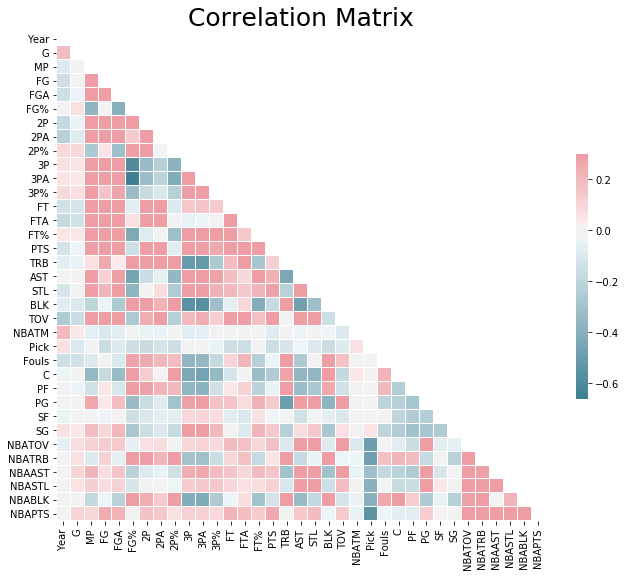

In [14]:
# Correlation Matrix to display strength of relationship between variables
import seaborn as sns
import matplotlib.pyplot as plt

corr = hist.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax.set_title("Correlation Matrix", fontsize=25)

sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5})
sns_plot.get_figure().savefig("../../static/images/correlation_matrix.png")

# Feature Selection

In [15]:
# Recursive feature elimination using a linear regression model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 30)
reg = rfe.fit(X_train.values, y_train.NBAPTS.values)

In [16]:
# Display mask of selected features
reg.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [17]:
# Eliminate features not used in RFE
col_list = []
c = df1.columns
for item in c:
    col_list = col_list + [item]
feature_picks = []
for x in range(0,29):
    if reg.support_[x]:
        feature_picks.append(col_list[x])
X_train=X_train[feature_picks]
X_test=X_test[feature_picks]
X_train.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,NBATM,Pick,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,-1.728846,-0.479510,-0.416491,1.111772,0.360329,1.194641,1.917621,1.592380,0.785754,-1.117664,...,2.838990,-0.686723,-1.695199,-1.562436,-0.031983,-0.429905,1.845239,-0.511725,-0.461344,-0.552679
Stromile Swift,-1.728846,0.158061,-0.303816,0.397644,-0.422276,1.831985,1.066267,0.390984,1.850293,-1.010880,...,2.054733,0.159502,-1.596244,-1.502210,0.588659,-0.429905,1.845239,-0.511725,-0.461344,-0.552679
Marcus Fizer,-1.728846,0.795631,0.552518,2.325790,1.240761,1.417712,2.839921,2.313217,1.256943,-0.797312,...,0.150110,-0.263610,-1.497288,-1.381758,1.002421,-0.429905,1.845239,-0.511725,-0.461344,-0.552679
Mike Miller,-1.728846,0.795631,-0.574237,-0.602135,-0.487494,-0.271248,-0.636440,-0.850459,0.541433,0.163746,...,-0.634146,-0.545685,-1.398333,-1.321532,-0.859506,-0.429905,-0.541935,-0.511725,2.167582,-0.552679
DerMarr Johnson,-1.728846,-0.266986,-0.822122,-0.816374,-0.715754,-0.239381,-1.133063,-1.411110,0.820657,0.484098,...,-0.073963,-1.250873,-1.299377,-1.261306,-0.652625,-0.429905,-0.541935,-0.511725,2.167582,-0.552679


# Linear Regression

In [18]:
# Fit linear regression model to training data
reg = LinearRegression().fit(X_train.values, y_train.NBAPTS.values)

#### Linear Regression Training

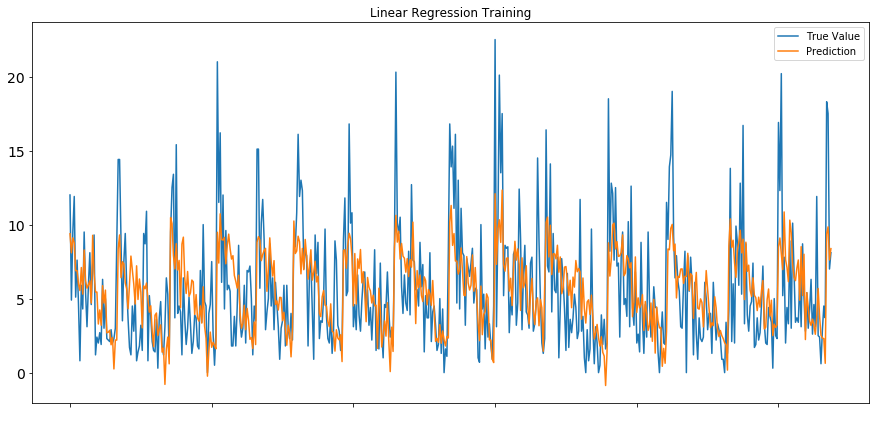

adj train r2 score: 0.34833635199098223
train mse: 10.122645250972115


In [19]:
train_y = y_train.copy(deep=True)
# Create prediction of train data
train_y['prediction'] = scale.inverse_transform(reg.predict(X_train.values))
train_y['NBAPTS'] = scale.inverse_transform(train_y['NBAPTS'])
# Plot prediction vs true values
train_y['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend()
plt.xlabel(" ")
plt.savefig('../../static/images/linear_regression_train.png')
plt.show()
print('adj train r2 score: ' + str(adj_r2((r2_score(train_y.NBAPTS, train_y.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse: ' + str(mean_squared_error(train_y.NBAPTS, train_y.prediction)))

#### Linear Regression Testing

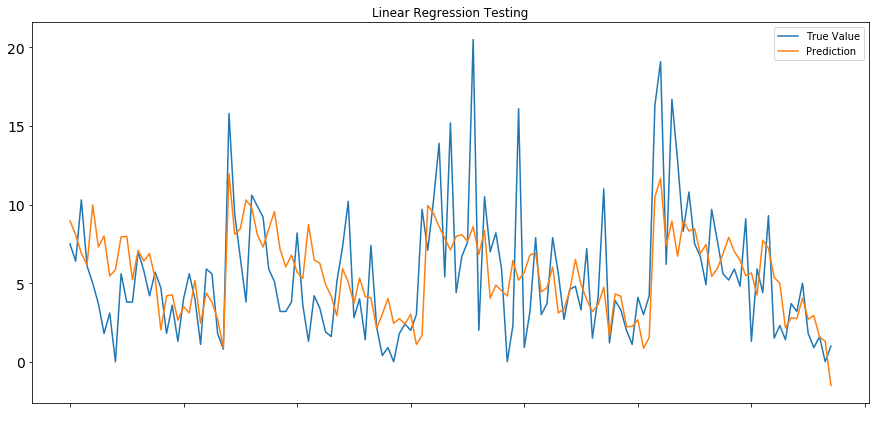

adj train r2 score: 0.2864531499473383
train mse: 10.976655541639657


In [20]:
# Linear Regression Testing
test_y = y_test.copy(deep=True)
# Create prediction of test data
test_y['prediction'] = scale.inverse_transform(reg.predict(X_test.values))
test_y['NBAPTS'] = scale.inverse_transform(test_y['NBAPTS'])
# Plot prediction vs true values
test_y['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend()
plt.xlabel(" ")
plt.savefig('../../static/images/linear_regression_test.png')
plt.show()
print('adj train r2 score: ' + str(adj_r2((r2_score(test_y.NBAPTS, test_y.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse: ' + str(mean_squared_error(test_y.NBAPTS, test_y.prediction)))

#### Linnear Regression Prediction Analysis

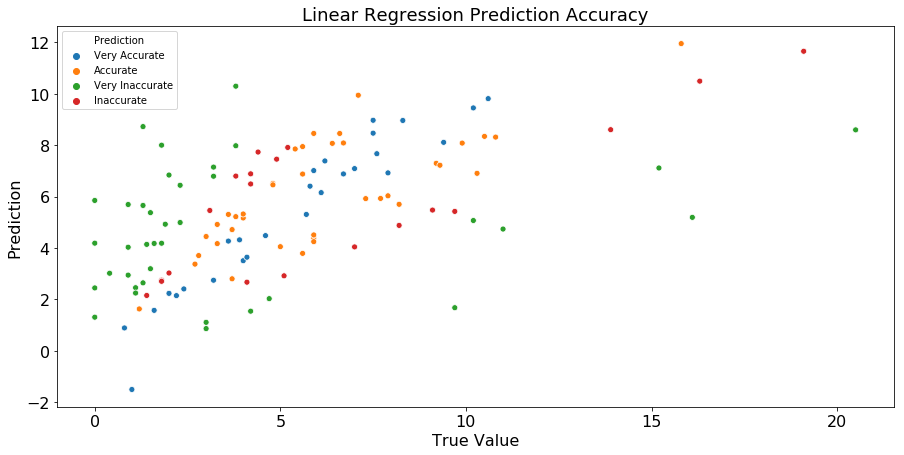

28.15% of test results are accurate.
20.0% of test results are very accurate.


In [21]:
# Group prediction results in increments of 20%, 50%, 80%, and 100% accuracy
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) >= 2, 'Prediction'] = 'Very Inaccurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Prediction'] = 'Inaccurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Prediction'] = 'Accurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Prediction'] = 'Very Accurate'

# Scatter plot to display true vs predicted valyes
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Prediction", data=test_y)
ax.set_title("Linear Regression Prediction Accuracy", fontsize=18)
ax.set_xlabel("True Value",fontsize=16)
ax.set_ylabel("Prediction",fontsize=16)
ax.tick_params(labelsize=16)
plt.savefig('../../static/images/linear_regression_prediction.png')
plt.show()
print (str(round(100*len(test_y[test_y['Prediction'] == 'Accurate'])/len(test_y),2)) + "% of test results are accurate.")
print (str(round(100*len(test_y[test_y['Prediction'] == 'Very Accurate'])/len(test_y),2)) + "% of test results are very accurate.")

#### Residual Value Point Differential Error

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


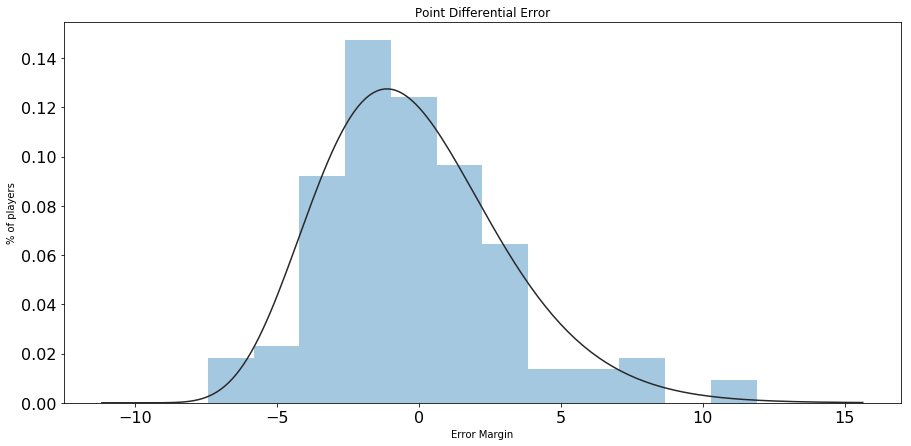

48.89% of tested predictions within 2 points of true value.


In [22]:
# Point differential error of residual value
from scipy import stats
test_y['residual'] = (test_y['NBAPTS'] - test_y['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y['residual'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error")
ax.set_xlabel("Error Margin")
ax.set_ylabel("% of players")
ax.tick_params(labelsize=16)
plt.savefig('../../static/images/linear_regression_pde.png')
plt.show()
print (str(round(100*len(test_y[abs(test_y['residual'])<=2])/len(test_y),2)) + "% of tested predictions within 2 points of true value.")

#### Cross Validation

In [23]:
# Create a separate train-test split for cross validation
from sklearn.model_selection import cross_val_score
X_cross = X_train.append(X_test, ignore_index = True)
y_cross = y_train.append(y_test, ignore_index = True)
X_cross = X_cross.set_index(hist.index)
y_cross = y_cross.set_index(hist.index)
# Run cross validation score
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('Cross Validation Score: ' + str(round(100*np.mean(cvs),2)))

Cross Validation Score: 30.55


# Random Forrest

In [24]:
# Fit random regressor to the training data
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_train.values, y_train.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Random Forrest Training

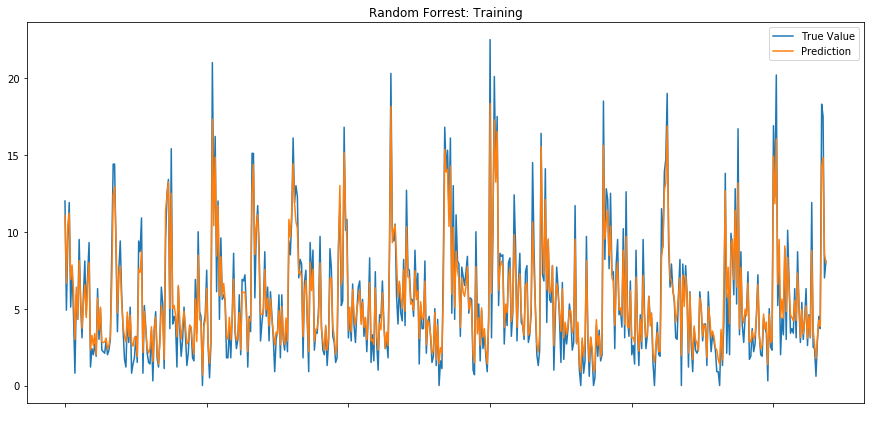

adj train r2 score: 0.9178573128992846
train mse: 1.27596695630111


In [25]:
train_y = y_train.copy(deep=True)
# Create prediction of train data
train_y['prediction'] = scale.inverse_transform(reg.predict(X_train.values))
train_y['NBAPTS'] = scale.inverse_transform(train_y['NBAPTS'])
# Plot prediction vs true values
train_y['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest: Training', label='True Value')
train_y['prediction'].plot(figsize=(15,7), title= 'Random Forrest: Training', label='Prediction')
plt.legend()
plt.xlabel(" ")
plt.savefig('../../static/images/random_forrest_train.png')
plt.show()
print('adj train r2 score: ' + str(adj_r2((r2_score(train_y.NBAPTS, train_y.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse: ' + str(mean_squared_error(train_y.NBAPTS, train_y.prediction)))

#### Random Forrest Testing

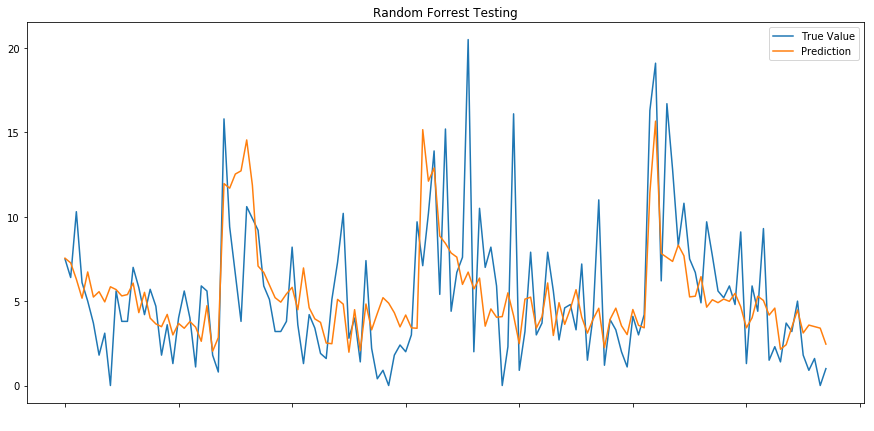

adj test r2: 0.3032708409989995
test mse: 10.71794512666666


In [26]:
# Random Forrest Testing
test_y = y_test.copy(deep=True)
# Create prediction of test data
test_y['prediction'] = scale.inverse_transform(reg.predict(X_test.values))
test_y['NBAPTS'] = scale.inverse_transform(test_y['NBAPTS'])
# Plot prediction vs true values
test_y['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest: Testing', label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', label='Prediction')
plt.legend()
plt.xlabel(" ")
plt.savefig('../../static/images/random_forrest_test.png')
plt.show()
print('adj test r2: ' + str(adj_r2((r2_score(test_y.NBAPTS, test_y.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse: ' + str(mean_squared_error(test_y.NBAPTS, test_y.prediction)))

#### Random Forrest Prediction Analysis

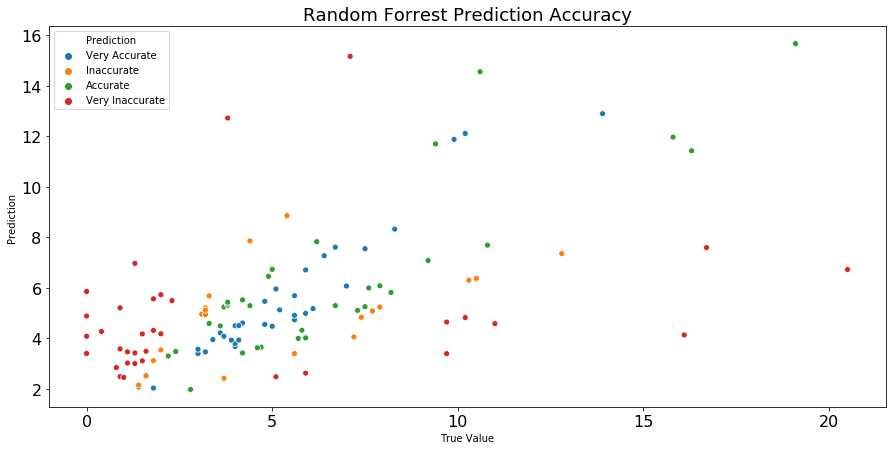

25.93% of test results are accurate.
25.19% of test results are very accurate.


In [27]:
# Group prediction results in increments of 20%, 50%, 80%, and 100% accuracy
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) >= 2, 'Prediction'] = 'Very Inaccurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Prediction'] = 'Inaccurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Prediction'] = 'Accurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Prediction'] = 'Very Accurate'

# Scatter plot to display true vs predicted valyes
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Prediction", data=test_y)
ax.set_title("Random Forrest Prediction Accuracy", fontsize=18)
ax.set_xlabel("True Value")
ax.set_ylabel("Prediction")
ax.tick_params(labelsize=16)
plt.savefig('../../static/images/random_forrest_prediction.png')
plt.show()
print (str(round(100*len(test_y[test_y['Prediction'] == 'Accurate'])/len(test_y),2)) + "% of test results are accurate.")
print (str(round(100*len(test_y[test_y['Prediction'] == 'Very Accurate'])/len(test_y),2)) + "% of test results are very accurate.")

#### Residual Value Point Differential Error

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


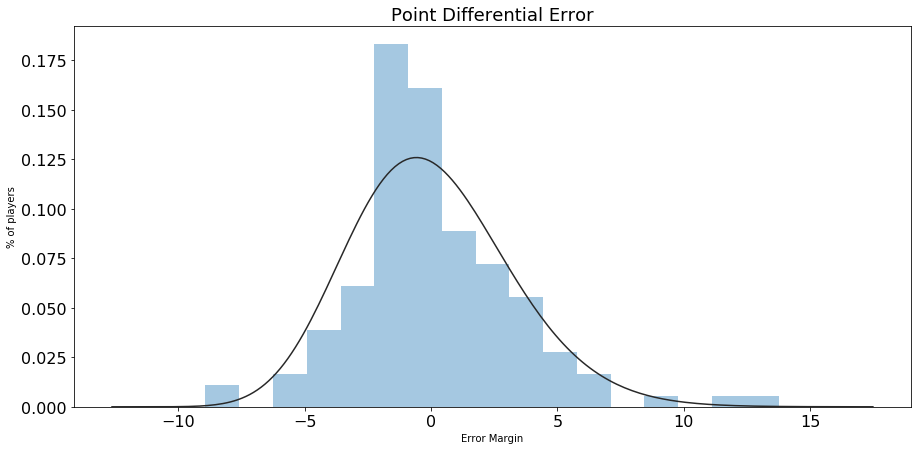

56.3% of tested predictions within 2 points of true value.


In [28]:
test_y['residual'] = (test_y['NBAPTS'] - test_y['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y['residual'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=18)
ax.set_xlabel("Error Margin")
ax.set_ylabel("% of players")
ax.tick_params(labelsize=16)
plt.savefig('../../static/images/linear_regression_pde.png')
plt.show()
print (str(round(100*len(test_y[abs(test_y['residual'])<=2])/len(test_y),2)) + "% of tested predictions within 2 points of true value.")

#### Cross Validation

In [29]:
# Run cross validation score
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('Cross Validation Score: ' + str(round(100*np.mean(cvs),2)))

Cross Validation Score: 39.86


# XGBoost Regressor

In [30]:
# Fit XGB Regressor to training data
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(X_train.values, y_train.NBAPTS.values)

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost-1.0.0_snapshot-py3.7.egg\xgboost\core.py:611: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

#### XGBRegressor Training

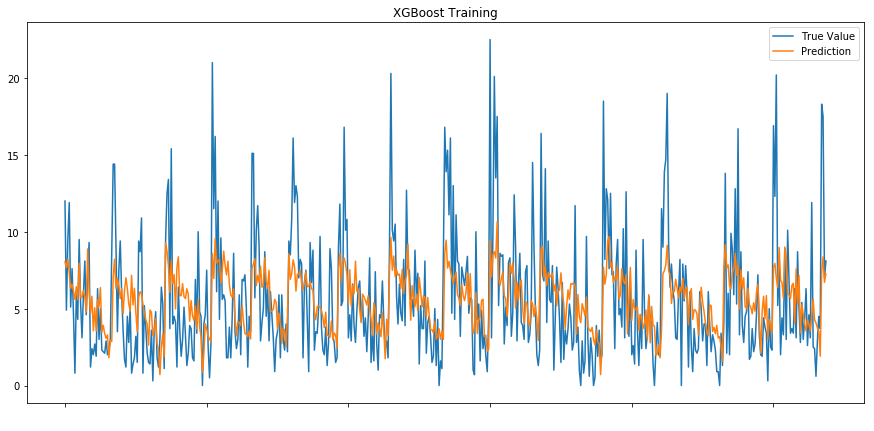

adj train r2: 0.30276958312184976
train mse: 10.830458611291524


In [31]:
train_y = y_train.copy(deep=True)
train_y['prediction'] = scale.inverse_transform(reg.predict(X_train.values))
train_y['NBAPTS'] = scale.inverse_transform(train_y['NBAPTS'])
train_y['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', label='True Value')
train_y['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', label='Prediction')
plt.legend()
plt.xlabel(" ")
plt.savefig('../../static/images/XGB_train.png')
plt.show()
print('adj train r2: ' + str(adj_r2((r2_score(train_y.NBAPTS, train_y.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse: ' + str(mean_squared_error(train_y.NBAPTS, train_y.prediction)))

#### XGBRegressor Testing

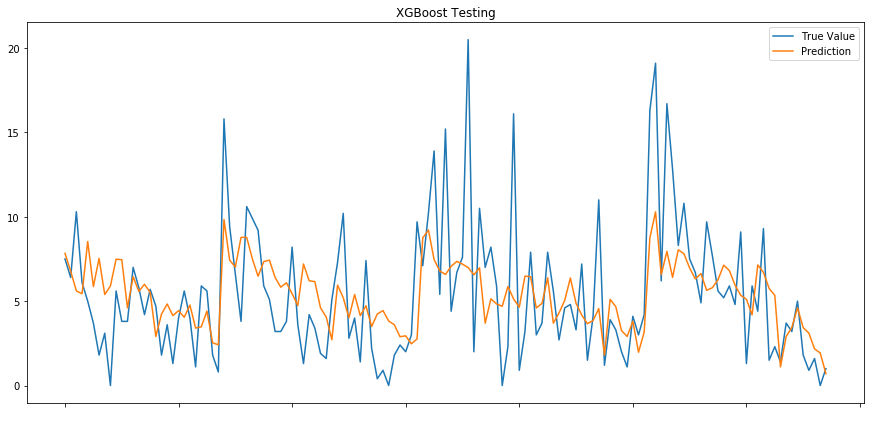

adj test r2: 0.27435258432159015
test mse: 11.162801329716558


In [32]:
test_y = y_test.copy(deep=True)
test_y['prediction'] = scale.inverse_transform(reg.predict(X_test.values))
test_y['NBAPTS'] = scale.inverse_transform(test_y['NBAPTS'])
test_y['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', label='Prediction')
plt.legend()
plt.xlabel(" ")
plt.savefig('../../static/images/XGB_train.png')
plt.show()
print('adj test r2: ' + str(adj_r2((r2_score(test_y.NBAPTS, test_y.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse: ' + str(mean_squared_error(test_y.NBAPTS, test_y.prediction)))

#### XGBRegressor Prediction Analysis

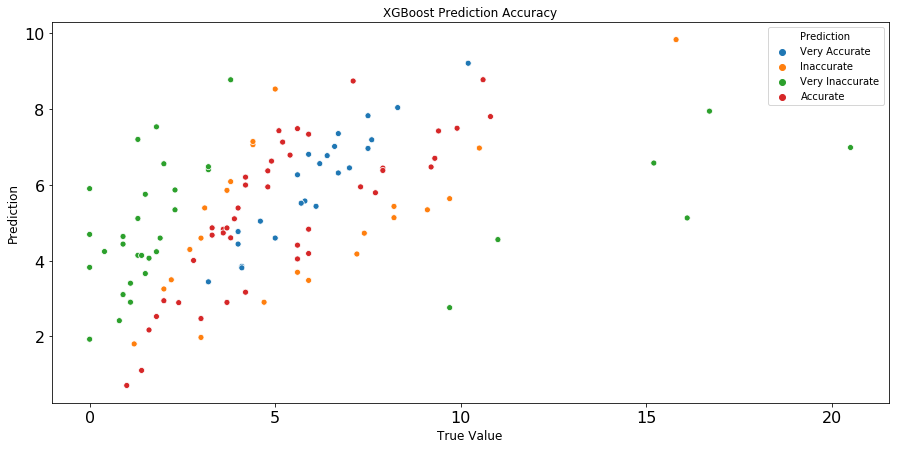

31.85% of test results are accurate.
17.04% of test results are very accurate.


In [33]:
# Group prediction results in increments of 20%, 50%, 80%, and 100% accuracy
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) >= 2, 'Prediction'] = 'Very Inaccurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Prediction'] = 'Inaccurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Prediction'] = 'Accurate'
test_y.loc[test_y[['prediction','NBAPTS']].max(axis=1)/test_y[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Prediction'] = 'Very Accurate'

# Scatter plot to display true vs predicted valyes
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Prediction", data=test_y)
ax.set_title("XGBoost Prediction Accuracy")
ax.set_xlabel("True Value",fontsize=12)
ax.set_ylabel("Prediction",fontsize=12)
ax.tick_params(labelsize=16)
plt.savefig('../../static/images/XGB_prediction.png')
plt.show()
print (str(round(100*len(test_y[test_y['Prediction'] == 'Accurate'])/len(test_y),2)) + "% of test results are accurate.")
print (str(round(100*len(test_y[test_y['Prediction'] == 'Very Accurate'])/len(test_y),2)) + "% of test results are very accurate.")

#### Residual Value Point Differential Error

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


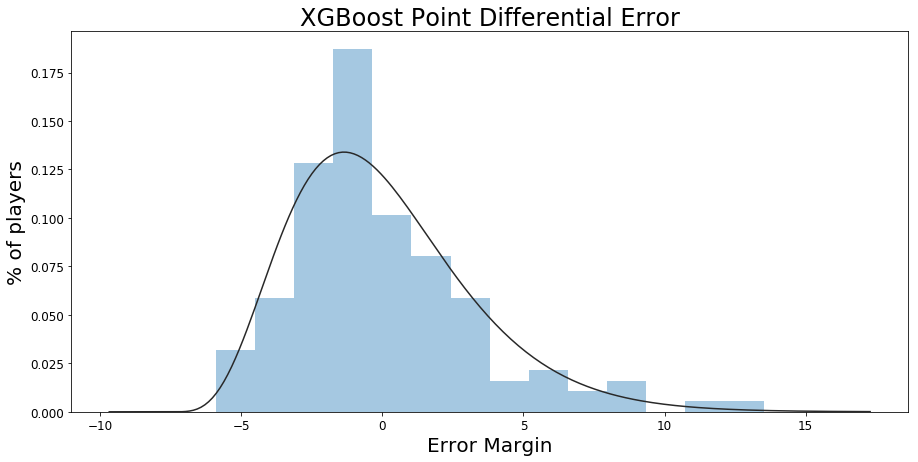

54.07% of tested predictions within 2 points of true value.


In [34]:
test_y['residual'] = (test_y['NBAPTS'] - test_y['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y['residual'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("XGBoost Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=12)
plt.savefig('../../static/images/xgb_pde.png')
plt.show()
print (str(round(100*len(test_y[abs(test_y['residual'])<=2])/len(test_y),2)) + "% of tested predictions within 2 points of true value.")

#### Cross Validation Score

In [35]:
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('Cross Validation Score: ' + str(round(100*np.mean(cvs),2)))

Cross Validation Score: 29.94


# 2020 Rookie Predictions

In [36]:
# Combine previous train/test data as train and add 2020 rookies under test
train_set=hist
test_set=rookies
train = np.split(train_set, [29], axis=1)
X_train=train[0]
y_train=train[1]
test = np.split(test_set, [29], axis=1)
X_test=test[0]
y_test=test[1]

In [37]:
X_test.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,NBATM,Pick,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,1.589235,-0.054463,-0.258745,2.468615,0.588589,2.979203,2.698028,1.071775,3.822309,-0.476959,...,0.934367,0.159502,1.867200,-1.562436,-0.445744,-0.429905,1.845239,-0.511725,-0.461344,-0.552679
Ja Morant,1.589235,-0.054463,1.228570,1.754487,1.534238,0.095224,1.350052,1.191914,0.489079,0.590882,...,-0.186000,4.108551,0.679734,-1.502210,-1.687029,-0.429905,-0.541935,1.954173,-0.461344,-0.552679
RJ Barrett,1.589235,1.008154,0.935614,2.040138,2.316844,-0.621787,1.491944,1.552333,0.017889,0.804450,...,-0.634146,1.287802,0.283911,-1.441984,-1.066387,-0.429905,-0.541935,-0.511725,-0.461344,1.809367
DeAndre Hunter,1.589235,1.008154,0.304632,-0.102246,-0.324451,0.429829,-0.139817,-0.289807,0.384370,0.056961,...,-0.410073,-1.250873,0.086000,-1.381758,-0.652625,-0.429905,-0.541935,-0.511725,2.167582,-0.552679
Darius Garland,1.589235,-6.005118,-0.754517,0.183406,-0.194016,0.700700,-0.565494,-0.850459,0.925365,1.124803,...,-0.634146,1.005727,-1.200422,-1.321532,-1.893910,-0.429905,-0.541935,1.954173,-0.461344,-0.552679


#### Final Prediction Model

In [38]:
# Re-run prediction model using LinnearRegression, RFE, and RandomForrestRegressor

end_cols = ['NBATOV','NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [scale, scale2, scale3, scale4, scale5, scale6]

test_y = y_test.copy(deep=True)
for x in range(6):
    nba_col = end_cols[x]
    scalar = scalars[5-x]
    # Use LinearRegression as base model
    model = LinearRegression()
    # Use RFE to eliminate features
    rfe = RFE(model, 29)
    # Fit model to train values
    reg = rfe.fit(X_train.values, y_train[nba_col].values)
    col_list = []
    c = hist.columns
    for item in c:
        col_list = col_list + [item]
    feature_picks = []
    #Pass through the 29 selected features
    for x in range(0,29):
        if reg.support_[x]:
            feature_picks.append(col_list[x])
    train_X = X_train[feature_picks]
    test_X = X_test[feature_picks]
    # Apply RandomForestRegressor to predict 2020 Rookie values
    model = RandomForestRegressor(n_estimators=1000).fit(train_X.values, y_train[nba_col].values.ravel())
    test_y[nba_col] = scalar.inverse_transform(model.predict(test_X.values))

In [39]:
train_y.head()

,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction
Name,,,,,,,
Kenyon Martin,1.684929,2.619629,0.580542,1.668575,4.150252,12.0,8.044072
Stromile Swift,-0.067104,0.616716,-0.540972,0.885544,2.092526,4.9,7.652646
Marcus Fizer,1.246921,0.985673,-0.017598,-0.158496,0.034800,9.5,8.228750
Mike Miller,0.516907,0.827549,0.431007,0.363524,-0.259160,11.9,7.320448
DerMarr Johnson,0.516907,-0.068491,-0.241901,0.363524,0.328761,5.1,6.311471


#### Random Forrest Prediction Training

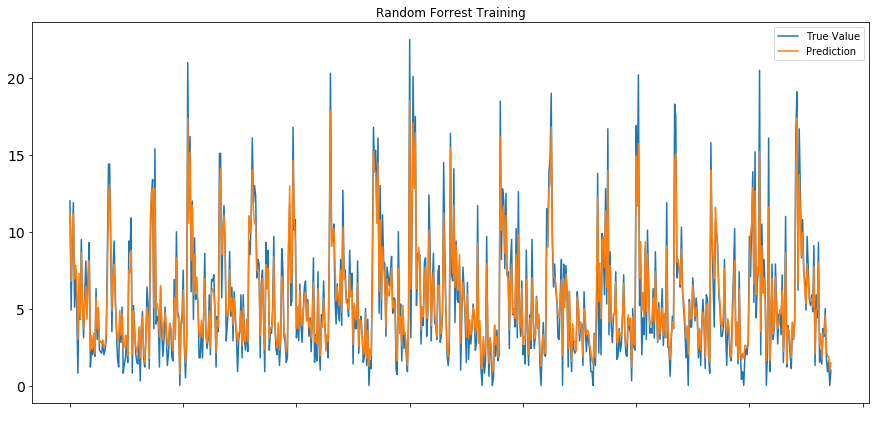

adj train r2: 0.9177074522728315
train mse: 1.290775152912329


In [40]:
# Random Forrest Training
train_y = y_train.copy(deep=True)
train_y['prediction'] = scale.inverse_transform(model.predict(train_X.values))
train_y['NBAPTS'] = scale.inverse_transform(train_y['NBAPTS'])
train_y['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend()
plt.xlabel(" ")
plt.savefig('../../static/images/rf_train_prediction.png')
plt.show()
print('adj train r2: ' + str(adj_r2((r2_score(train_y.NBAPTS, train_y.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse: ' + str(mean_squared_error(train_y.NBAPTS, train_y.prediction)))

#### Random Forrest Training Prediction Analysis

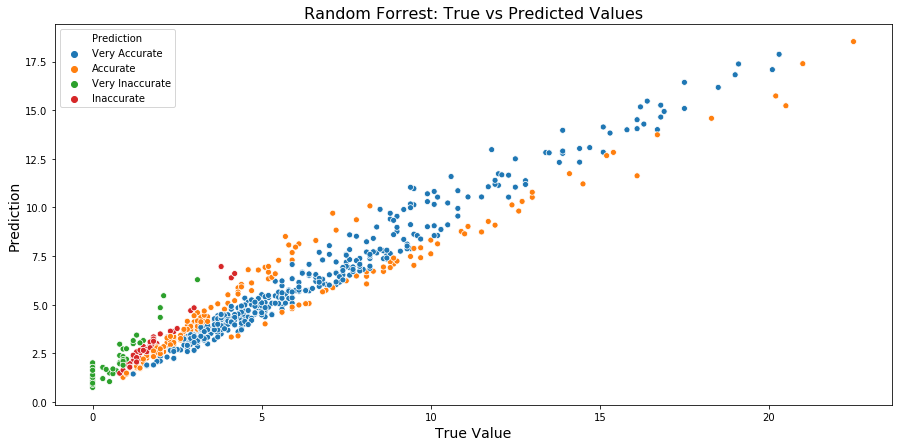

26.3% of test results are accurate.
60.77% of test results are very accurate.


In [41]:
# Group prediction results in increments of 20%, 50%, 80%, and 100% accuracy
train_y.loc[train_y[['prediction','NBAPTS']].max(axis=1)/train_y[['prediction','NBAPTS']].min(axis=1) >= 2, 'Prediction'] = 'Very Inaccurate'
train_y.loc[train_y[['prediction','NBAPTS']].max(axis=1)/train_y[['prediction','NBAPTS']].min(axis=1) < 2, 'Prediction'] = 'Inaccurate'
train_y.loc[train_y[['prediction','NBAPTS']].max(axis=1)/train_y[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Prediction'] = 'Accurate'
train_y.loc[train_y[['prediction','NBAPTS']].max(axis=1)/train_y[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Prediction'] = 'Very Accurate'

# Scatter plot to display true vs predicted valyes
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Prediction", data=train_y)
ax.set_title("Random Forrest: True vs Predicted Values", fontsize=16)
ax.set_xlabel("True Value",fontsize=14)
ax.set_ylabel("Prediction",fontsize=14)
ax.tick_params(labelsize=10)
plt.savefig('../../static/images/rf_prediction_analysis.png')
plt.show()
print (str(round(100*len(train_y[train_y['Prediction'] == 'Accurate'])/len(train_y),2)) + "% of test results are accurate.")
print (str(round(100*len(train_y[train_y['Prediction'] == 'Very Accurate'])/len(train_y),2)) + "% of test results are very accurate.")

# 2020 Rookie Predicted Results

In [42]:
# Display predicted results of 2020 Rookies
test_y = test_y.loc[~test_y.index.duplicated(keep='first')]
test_y

,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,
Zion Williamson,2.1847,7.4722,2.4209,1.3213,0.7979,15.1920
Ja Morant,2.8623,3.6078,6.4147,1.1381,0.4587,15.3191
RJ Barrett,1.7524,3.8777,3.0921,0.5592,0.3325,13.0461
DeAndre Hunter,1.2497,4.0036,1.2409,0.5727,0.3914,10.4094
Darius Garland,2.3254,3.3700,4.6847,0.6158,0.3089,10.0958
Jarrett Culver,1.7169,3.6108,2.5312,0.9366,0.2782,12.5381
Coby White,2.0733,2.8887,4.1514,0.7727,0.2172,11.3403
Jaxson Hayes,1.3170,4.3505,0.9836,0.5313,0.9275,8.1734
Rui Hachimura,1.0368,3.7735,0.9894,0.5184,0.2956,8.3056


In [43]:
# Create column for weighted Fantasy Value
test_y['Value'] = 1*test_y['NBAPTS'] + 1.2*test_y['NBATRB'] + 1.5*test_y['NBAAST'] + 3*test_y['NBASTL'] + 3*test_y['NBABLK']+ (-1)*test_y['NBATOV']
test_y.sort_values('Value', ascending=False)

,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,,
Zion Williamson,2.1847,7.4722,2.4209,1.3213,0.7979,15.1920,31.96289
Ja Morant,2.8623,3.6078,6.4147,1.1381,0.4587,15.3191,31.19861
RJ Barrett,1.7524,3.8777,3.0921,0.5592,0.3325,13.0461,23.26019
Jarrett Culver,1.7169,3.6108,2.5312,0.9366,0.2782,12.5381,22.59536
Coby White,2.0733,2.8887,4.1514,0.7727,0.2172,11.3403,21.93024
Darius Garland,2.3254,3.3700,4.6847,0.6158,0.3089,10.0958,21.61555
Cam Reddish,1.5391,2.6283,1.6391,1.1448,0.3311,12.0718,20.57301
DeAndre Hunter,1.2497,4.0036,1.2409,0.5727,0.3914,10.4094,18.71767
Jaxson Hayes,1.3170,4.3505,0.9836,0.5313,0.9275,8.1734,17.92880


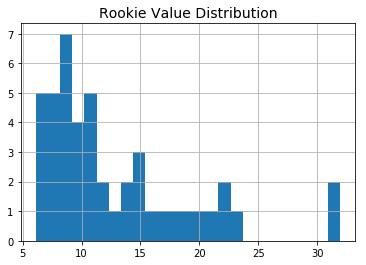

In [44]:
# Show value distribution of 2020 Rookie class
test_y['Value'].hist(bins=25)
plt.title("Rookie Value Distribution", fontsize=14)
plt.savefig('../../static/images/rookie_value_distribution.png')
plt.show()

In [45]:
# Round predicted values
test_y = test_y.round(2)
test_y = test_y.sort_index(axis = 0) 
test_y.tail()

,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,,
Terance Mann,0.47,1.65,0.86,0.33,0.17,2.46,6.78
Ty Jerome,0.95,1.62,2.13,0.62,0.11,4.52,10.89
Tyler Cook,0.45,2.00,0.61,0.35,0.25,4.40,9.07
Tyler Herro,0.84,2.63,1.55,0.56,0.16,7.73,14.53
Zion Williamson,2.18,7.47,2.42,1.32,0.80,15.19,31.96


In [46]:
# Export predicted results to CSV file
test_y.to_csv('../2020_Rookie_Predictions.csv')